<h2>Theme Creation</h2>

In [2]:
# from DataStructures import *
# figure_params = dict(
#     figsize = (10, 12),
#     dpi = 50,
#     paper_color = (71/255, 204/255, 107/255, 0.45),
#     plot_background_color = (1, 1, 1, 1)
# )

# font_params = dict(
#     size = 20,
#     color = (0, 0, 0, 1), 
#     family = "Monospace",
#     weight = "normal"
# )

# title_params = dict(
#     font = dict(size = 100,
#                 color = (0, 0, 0, 0),
#                 family = 'Arial',
#                 weight = 'bold')
# )

# axes_params = dict(
#     font = dict(
#         size = 1000,
#         color = (1,0,1,1),
#         weight = 'bold'
#     )
# )

# legend_params = dict(font = dict(color = (0,1,0,1)))

# color_palette = dict(colors = [(1,0,0),
#                                 (0,1,0),
#                                 (0,0,1),])

# theme = Theme(figure = figure_params,
#                 title = title_params,
#                 axes = axes_params,
#                 legend = legend_params,
#                 color_palette = color_palette,
#                 font = font_params)

In [3]:
# theme.save('./theme_1.json')

<h2>Figure Object Config and simple Plotting</h2>

In [1]:
from Figure import Figure
from DataStructures import *

In [2]:
theme = Theme.load('./theme_1.json')

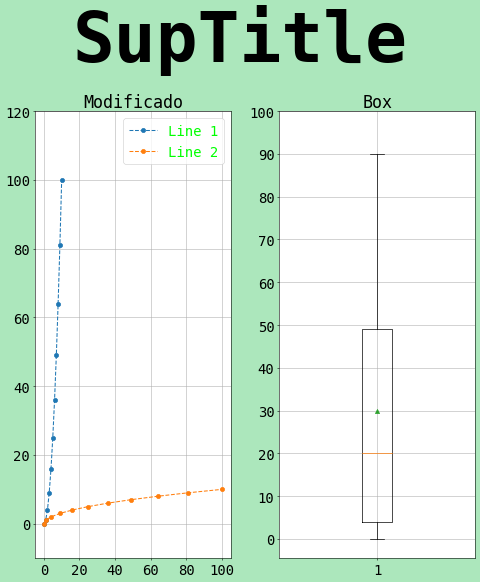

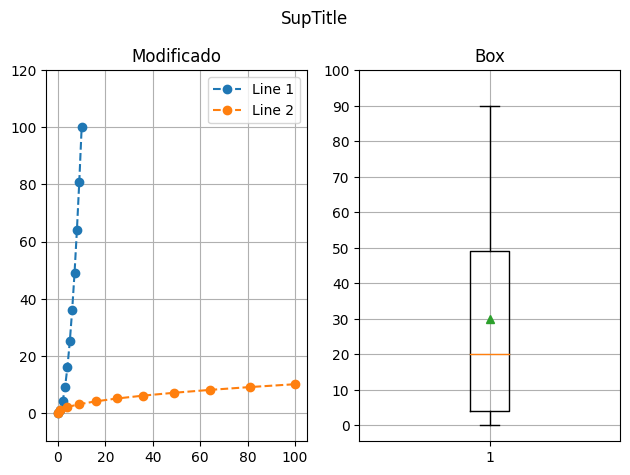

In [43]:
import numpy as np
import pandas as pd
# TUPLE EXAMPLES
x = range(11)
y = tuple(map(lambda x: x*x, x)) 
data = (x, y)

# NDARRAY EXAMPLES
# x = np.array(x)
# y = np.array(y)
# data = np.c_[x, y]

# Series Example
# x = pd.Series(x)
# y = pd.Series(y)
# data = (x, y)

# Dataframe Example
data = pd.DataFrame({'x': x, 'y': y})
data['z'] = data.y - data.x
x = data.x
y = data.y

def test_plots(theme = None):
    fig = Figure(nrows = 1, ncols = 2, theme = theme, backend = Backend.matplotlib)

    fig.plot(x = zip(x, y), y = zip(y, x),  n_plot = 0, title = "Titulo 1",
             plot_type = PlotType.scatter,
            legend = True, grid = True,
             limits = (None, (-10, 120)),
             #Matplotlib plot type kwargs
             label = ["Line 1", "Line 2"],
             marker = 'o', linestyle = '--', markersize = 6,
             )
    
    fig.plot(data = data)

    fig.plot(x = 'z', n_plot = 1, title = "Box",
             plot_type = PlotType.box,
             grid = True,
             ticks = (None, range(0,101, 10)),
             #Matplotlib plot type kwargs
             showmeans = True
           )
             
    fig.plot(suptitle = 'SupTitle', title = "Modificado quitado")
    fig.plot(n_plot = 0, title = "Modificado")
    fig.show()


test_plots(theme)
test_plots()

<h2>Backend Change and plot persistence</h2>

In [1]:
from Figure import Figure
from DataStructures import *

In [23]:
fig = Figure(log = True)

Empty Backend Initialized
Empty Backend: CONFIGURING


In [24]:
fig.set_theme_json('./theme_1.json')

Empty Backend: CONFIGURING


In [25]:
fig.plot(title = "Hola")
fig.plot(data = (range(11), list(map(lambda x: x*x, range(11)))), plot_type = PlotType.scatter)
print(fig.get_current_plot())

Empty Backend: PLOTTING
Empty Backend: PLOTTING
[((), {'title': 'Hola'}), ((), {'data': (range(0, 11), [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]), 'plot_type': <PlotType.scatter: 1>})]


In [26]:
fig.show()
print(fig.get_history())

Empty Backend: SHOWING
[[((), {'title': 'Hola'}), ((), {'data': (range(0, 11), [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]), 'plot_type': <PlotType.scatter: 1>})]]


In [27]:
fig.change_backend(Backend.matplotlib)

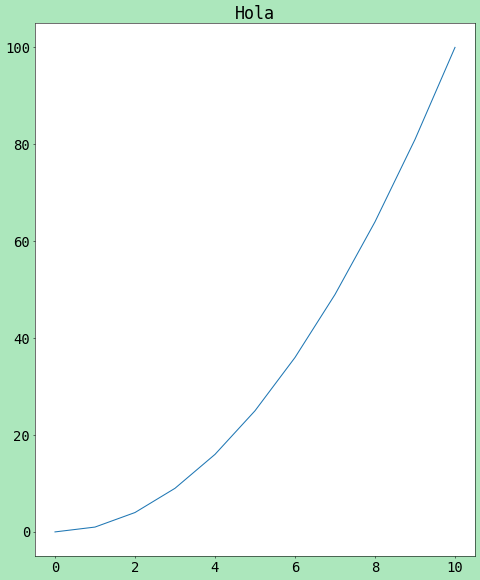

In [28]:
fig.redo_plot(0)

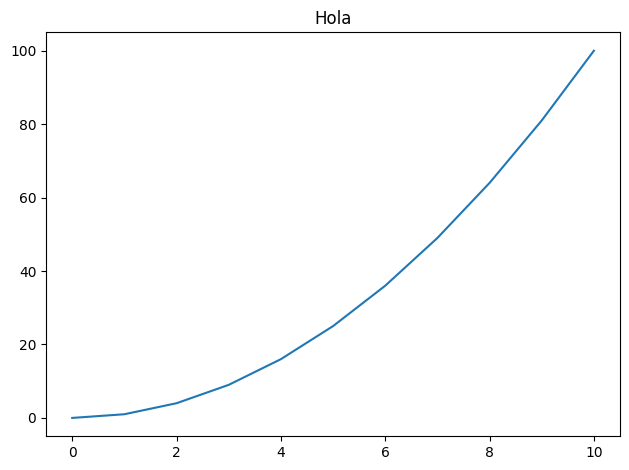

In [29]:
fig.reset_theme()
fig.redo_plot(0)

In [30]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1,2)
# x = range(0, 10)
# y = list(map(lambda x: x*x, x))
# axes[0].plot(x, y)
# axes[0].grid()
# axes[0].plot(y, x)
# axes[0].grid()
# axes[1].plot(x, y)
# axes[1].set_title("Hola")
# axes[1].set_xlim(None, 5)
# # axes[1].set_xticks(None)
# plt.suptitle("Suptitle")
# plt.tight_layout()
# plt.show()

In [28]:
import matplotlib.pyplot as plt

In [29]:
data

,x,y,z
0,0,0,0
1,1,1,0
2,2,4,2
3,3,9,6
4,4,16,12
5,5,25,20
6,6,36,30
7,7,49,42
8,8,64,56
9,9,81,72


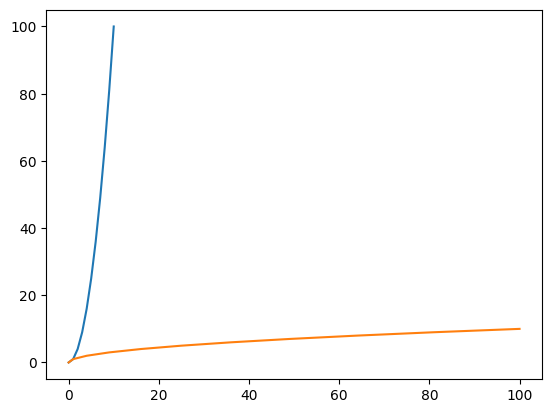

In [34]:
plt.figure()
plt.plot(data[['x', 'y']], data[['y', 'x']])
plt.show()

In [37]:
data[['x', 'y']].values.tolist()

[[0, 0],
 [1, 1],
 [2, 4],
 [3, 9],
 [4, 16],
 [5, 25],
 [6, 36],
 [7, 49],
 [8, 64],
 [9, 81],
 [10, 100]]

In [39]:
list(zip(x, y))

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100)]